#  Predicting Corporate Credit Ratings

### Data preparation 

In [194]:
# Importing libraries 
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from random import sample
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle
! pip install wordcloud
from wordcloud import WordCloud

In [195]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [208]:
# Data import 

df = pd.read_csv('corporate_rating.csv')

In [209]:
# Display the dimensions
print("The credit rating dataset has", df.shape[0], "records, each with", df.shape[1],
    "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


In [210]:
# Display the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [211]:
df.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Imbalanced data We have 671 triple-Bs (BBB) but only 1 D. 
Ratings are classified as letters we can understand it more from this website 

https://www.investopedia.com/terms/c/corporate-credit-rating.asp

We will simplify it by giving each ratng its risk meaning : high, medium or low. 

In [212]:
rating_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

df.Rating = df.Rating.map(rating_dict)

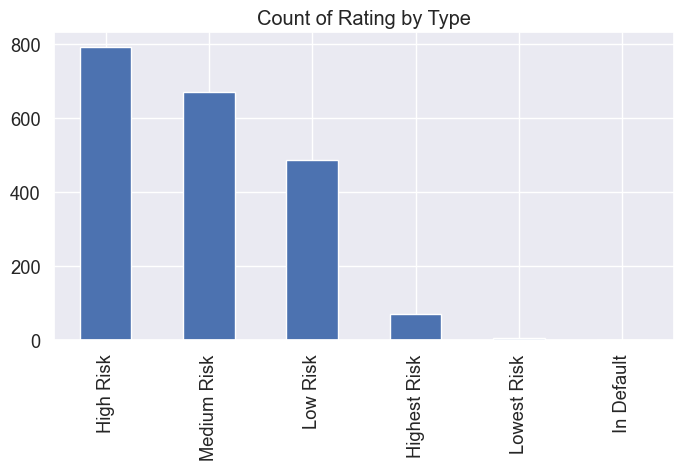

In [213]:
df.Rating.value_counts()

#plotting the results
pl = df['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

In [214]:
df['Rating'] = df['Rating'].replace('Lowest Risk', 'Low Risk')

df['Rating'] = df['Rating'].replace('In Default', 'Highest Risk')

df.Rating.value_counts()

High Risk       792
Medium Risk     671
Low Risk        494
Highest Risk     72
Name: Rating, dtype: int64

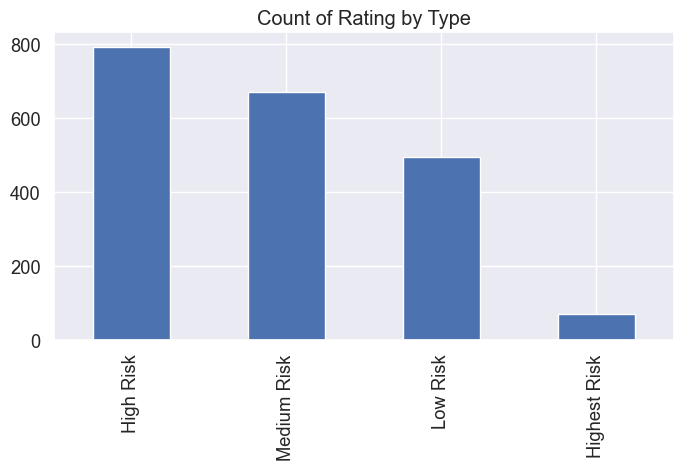

In [215]:
#plotting the results again
pl = df['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

In [216]:
# resample the targests 

In [217]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [218]:
print('There are',df.Name.nunique(),'companies in our dataset')

There are 593 companies in our dataset


In [219]:
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


checking the description table where it gives us statistical infos about the data where we can look at distribution for example. 

if we look at the first ratio (Current Ratio) 50% of the data falls between 1.07 and 2.1 where the min and max values are -.9 and 1725.
=>presence of outliers 


In [15]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)].dropna()
df_no_outliers = remove_outliers(df)


In [16]:
df_no_outliers


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover


Result shows that dataFrame no outliers has 0 rows, it means that all our rows have outliers in it. we double check 

We will use the function .skew from pandas in all columns. It should return between 0 and 1 if a column is normally distributed.

In [17]:
df.skew()

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

In [18]:
## getting the numerical and cat data into 2 dataframes

numericals = df.select_dtypes(include=['int', 'float'])
categorical = df.select_dtypes(include=['object'])

In [19]:
numericals

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,0.112672,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,-0.344004,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,0.091267,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,0.040450,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


Analyzing the data to identify trends, patterns, and relationships between company attributes and credit ratings. Visualize the results using plots and graphs to gain a better understanding of the data.


### Numericals

##### Corr matrix 

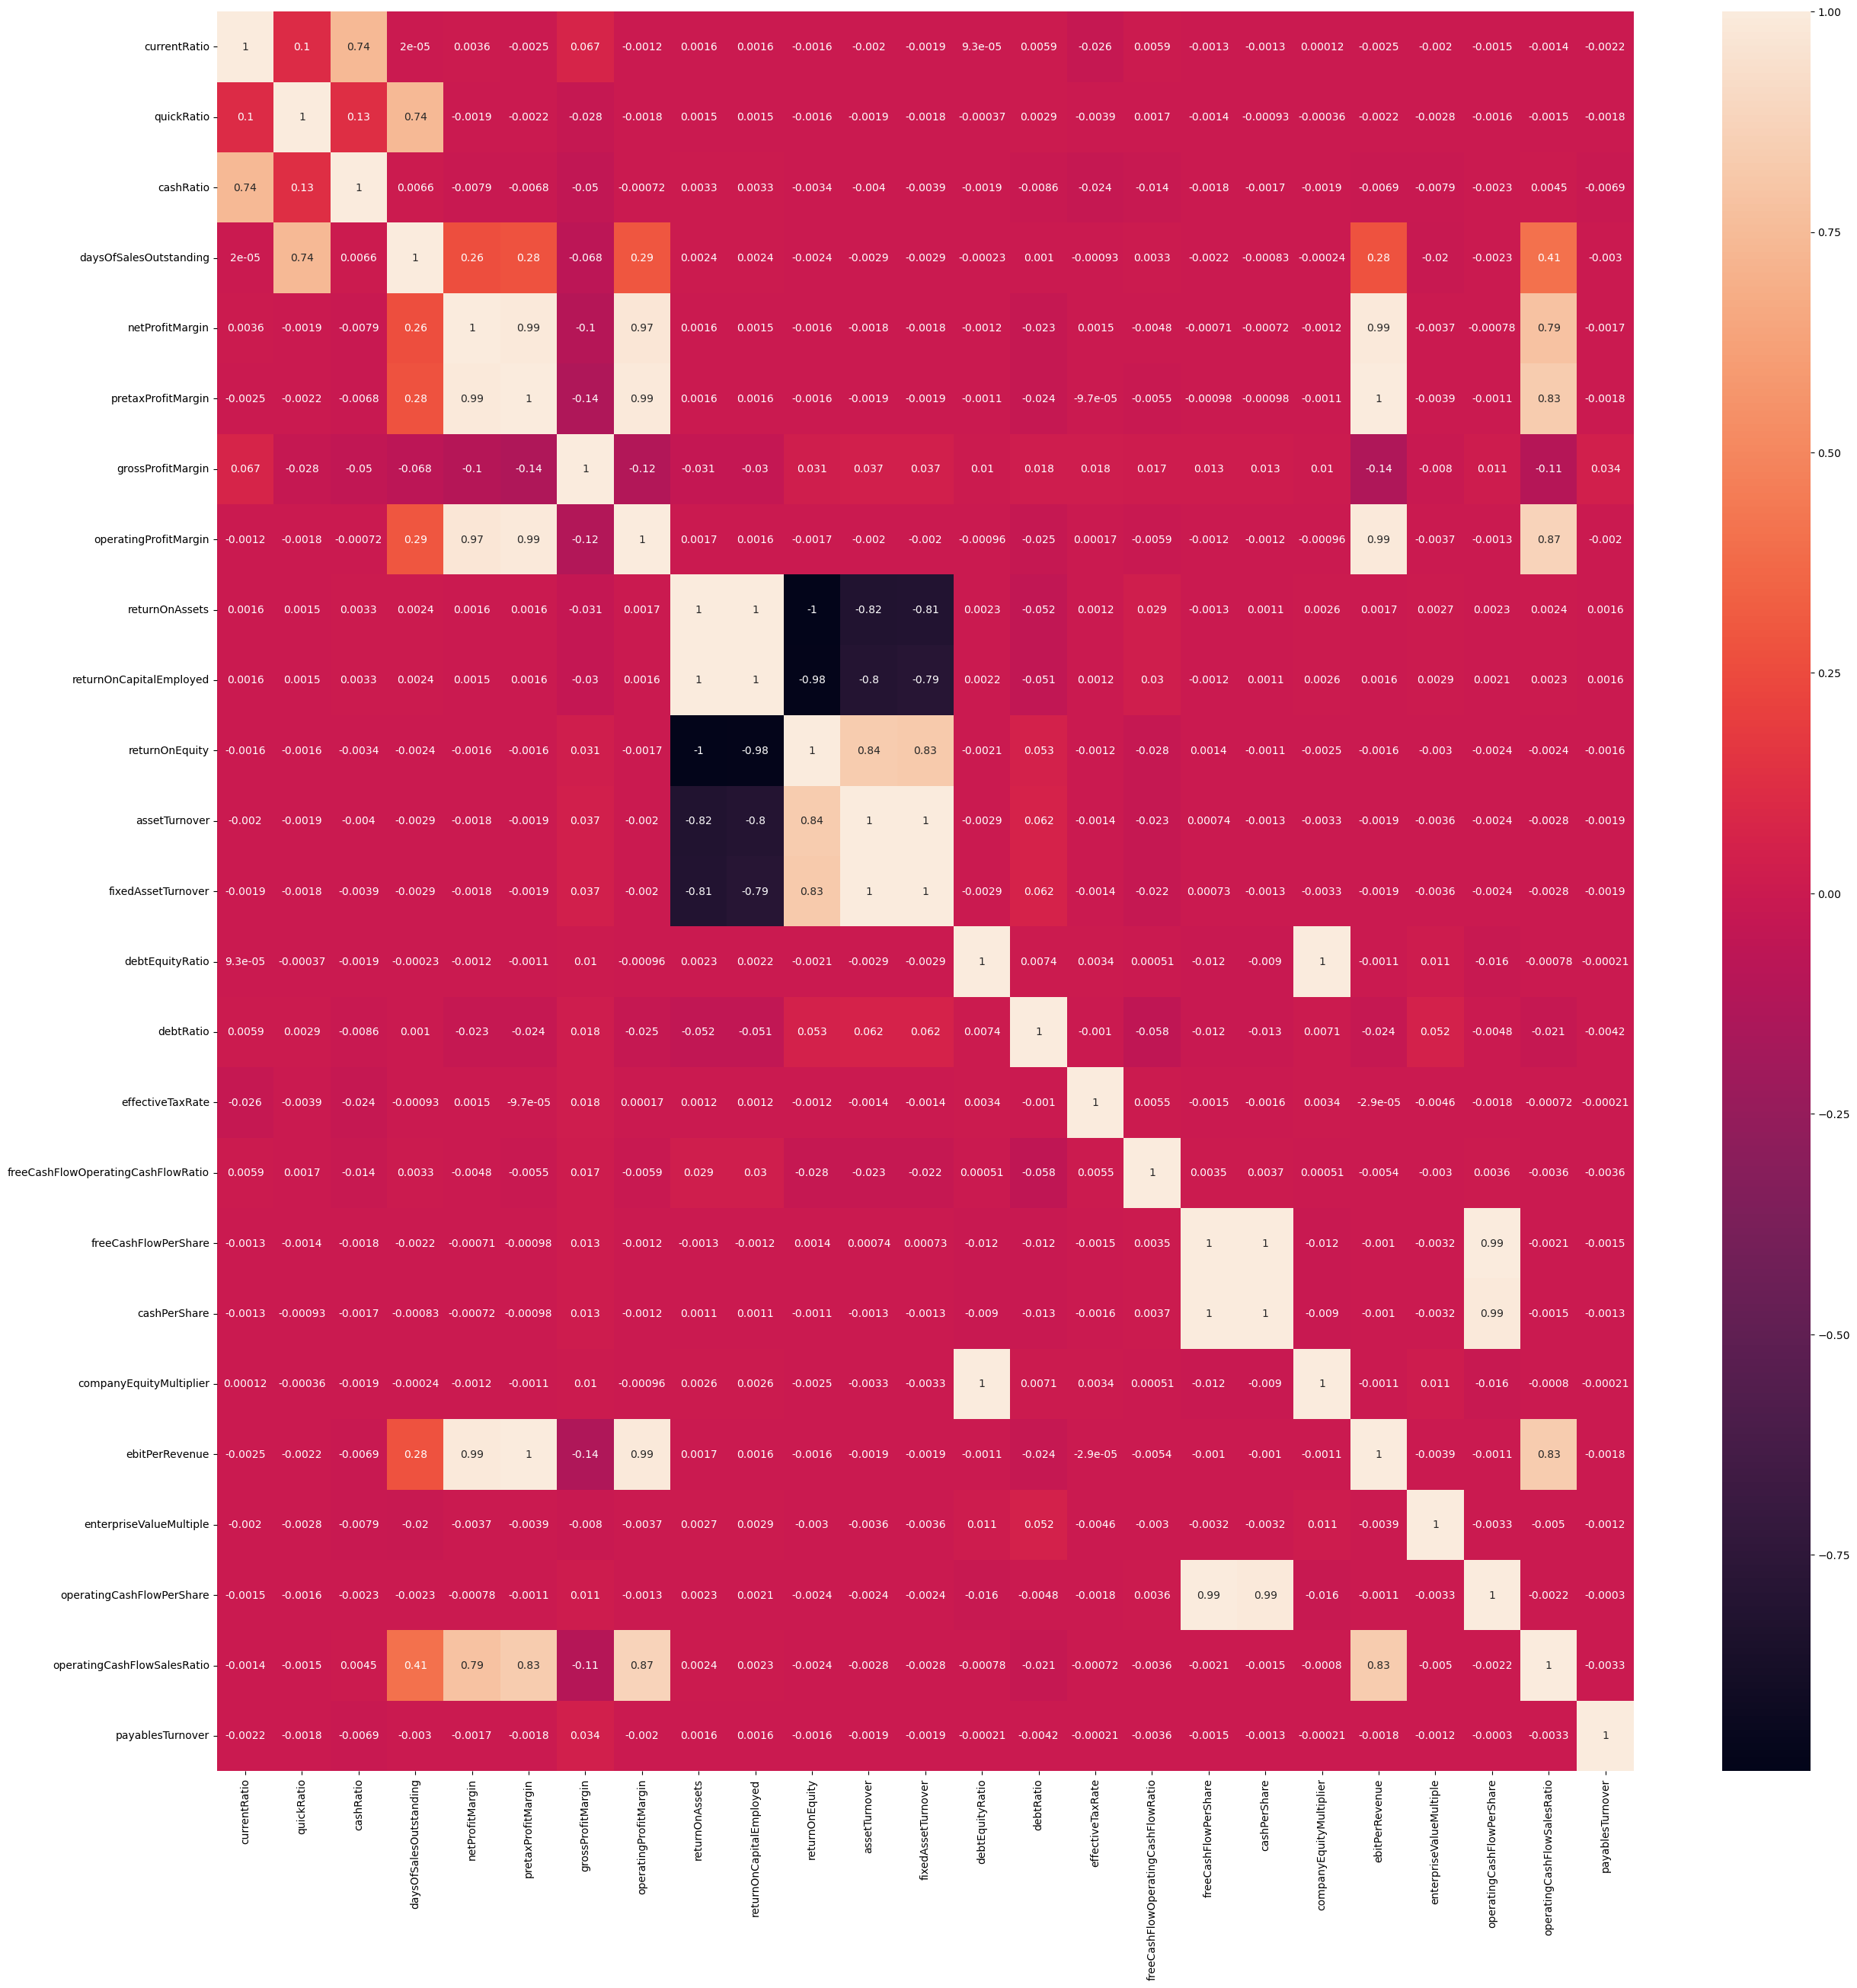

In [20]:
###check the multicollinearity between the features
correlations_matrix = numericals.corr()
#correlations_matrix
fig, ax=plt.subplots(figsize=(30,30))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

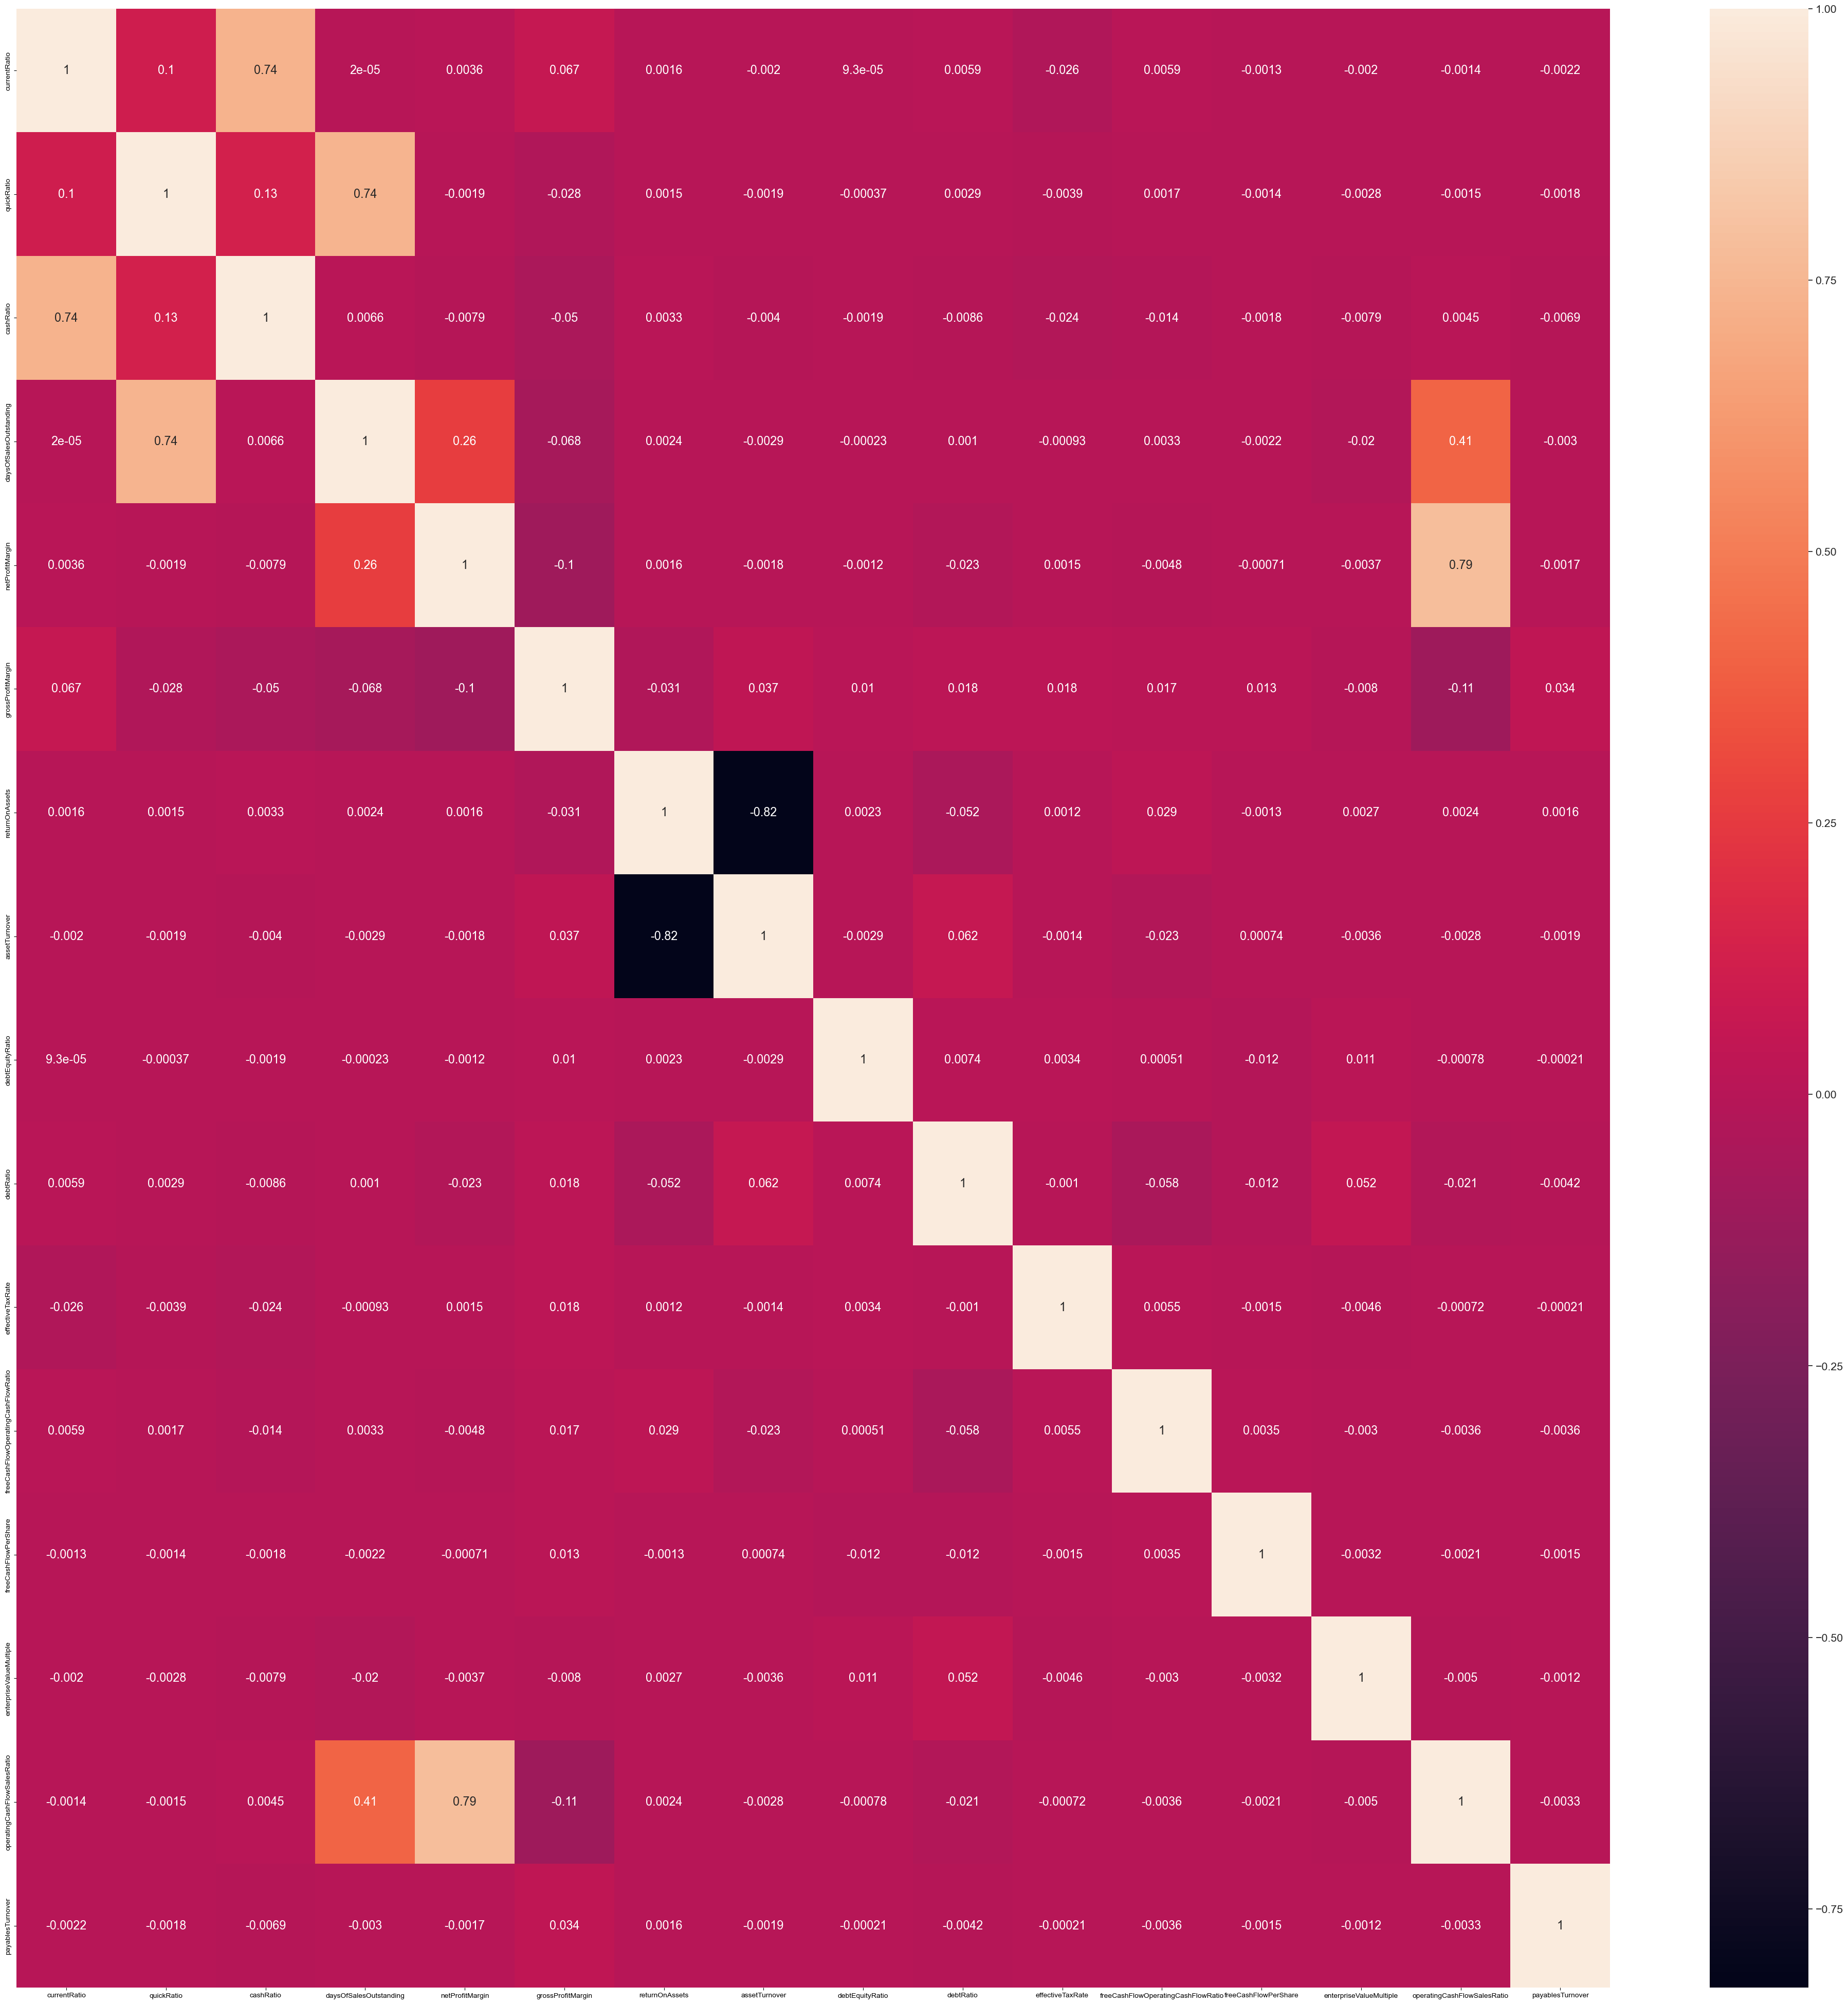

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
high_corr_cols = set()
for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > 0.9:
            colname = correlations_matrix.columns[i]
            high_corr_cols.add(colname)

numerical = numericals.drop(high_corr_cols, axis=1)
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.4)
# Create a heatmap
sns.heatmap(numerical.corr(), annot=True)
plt.show()

### Categoricals 

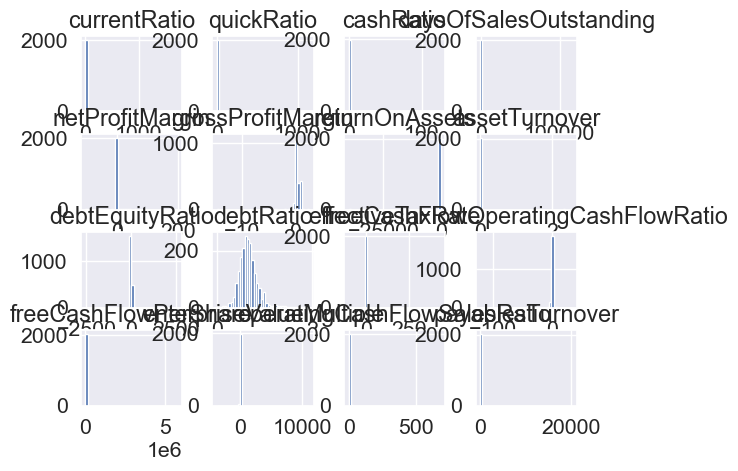

In [22]:
numerical.hist(bins=40)
sns.set(rc={'figure.figsize':(70,100)})

In [23]:
numerical.shape # we dropped 9 highly correlated columns 

(2029, 16)

In [24]:
categorical['Date'].value_counts()

6/15/2012     223
11/30/2015      8
10/24/2016      8
10/28/2015      8
12/14/2016      7
             ... 
10/30/2014      1
8/29/2016       1
7/22/2013       1
10/14/2014      1
4/28/2016       1
Name: Date, Length: 904, dtype: int64

In [25]:
categorical['Date'] = pd.to_datetime(categorical['Date'])
categorical['Year'] = categorical['Date'].dt.year
categorical = categorical.drop('Date',axis=1)

In [26]:
categorical.head()

,Rating,Name,Symbol,Rating Agency Name,Sector,Year
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,Consumer Durables,2015
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,Consumer Durables,2014
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,Consumer Durables,2015
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,Consumer Durables,2012
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,Consumer Durables,2016


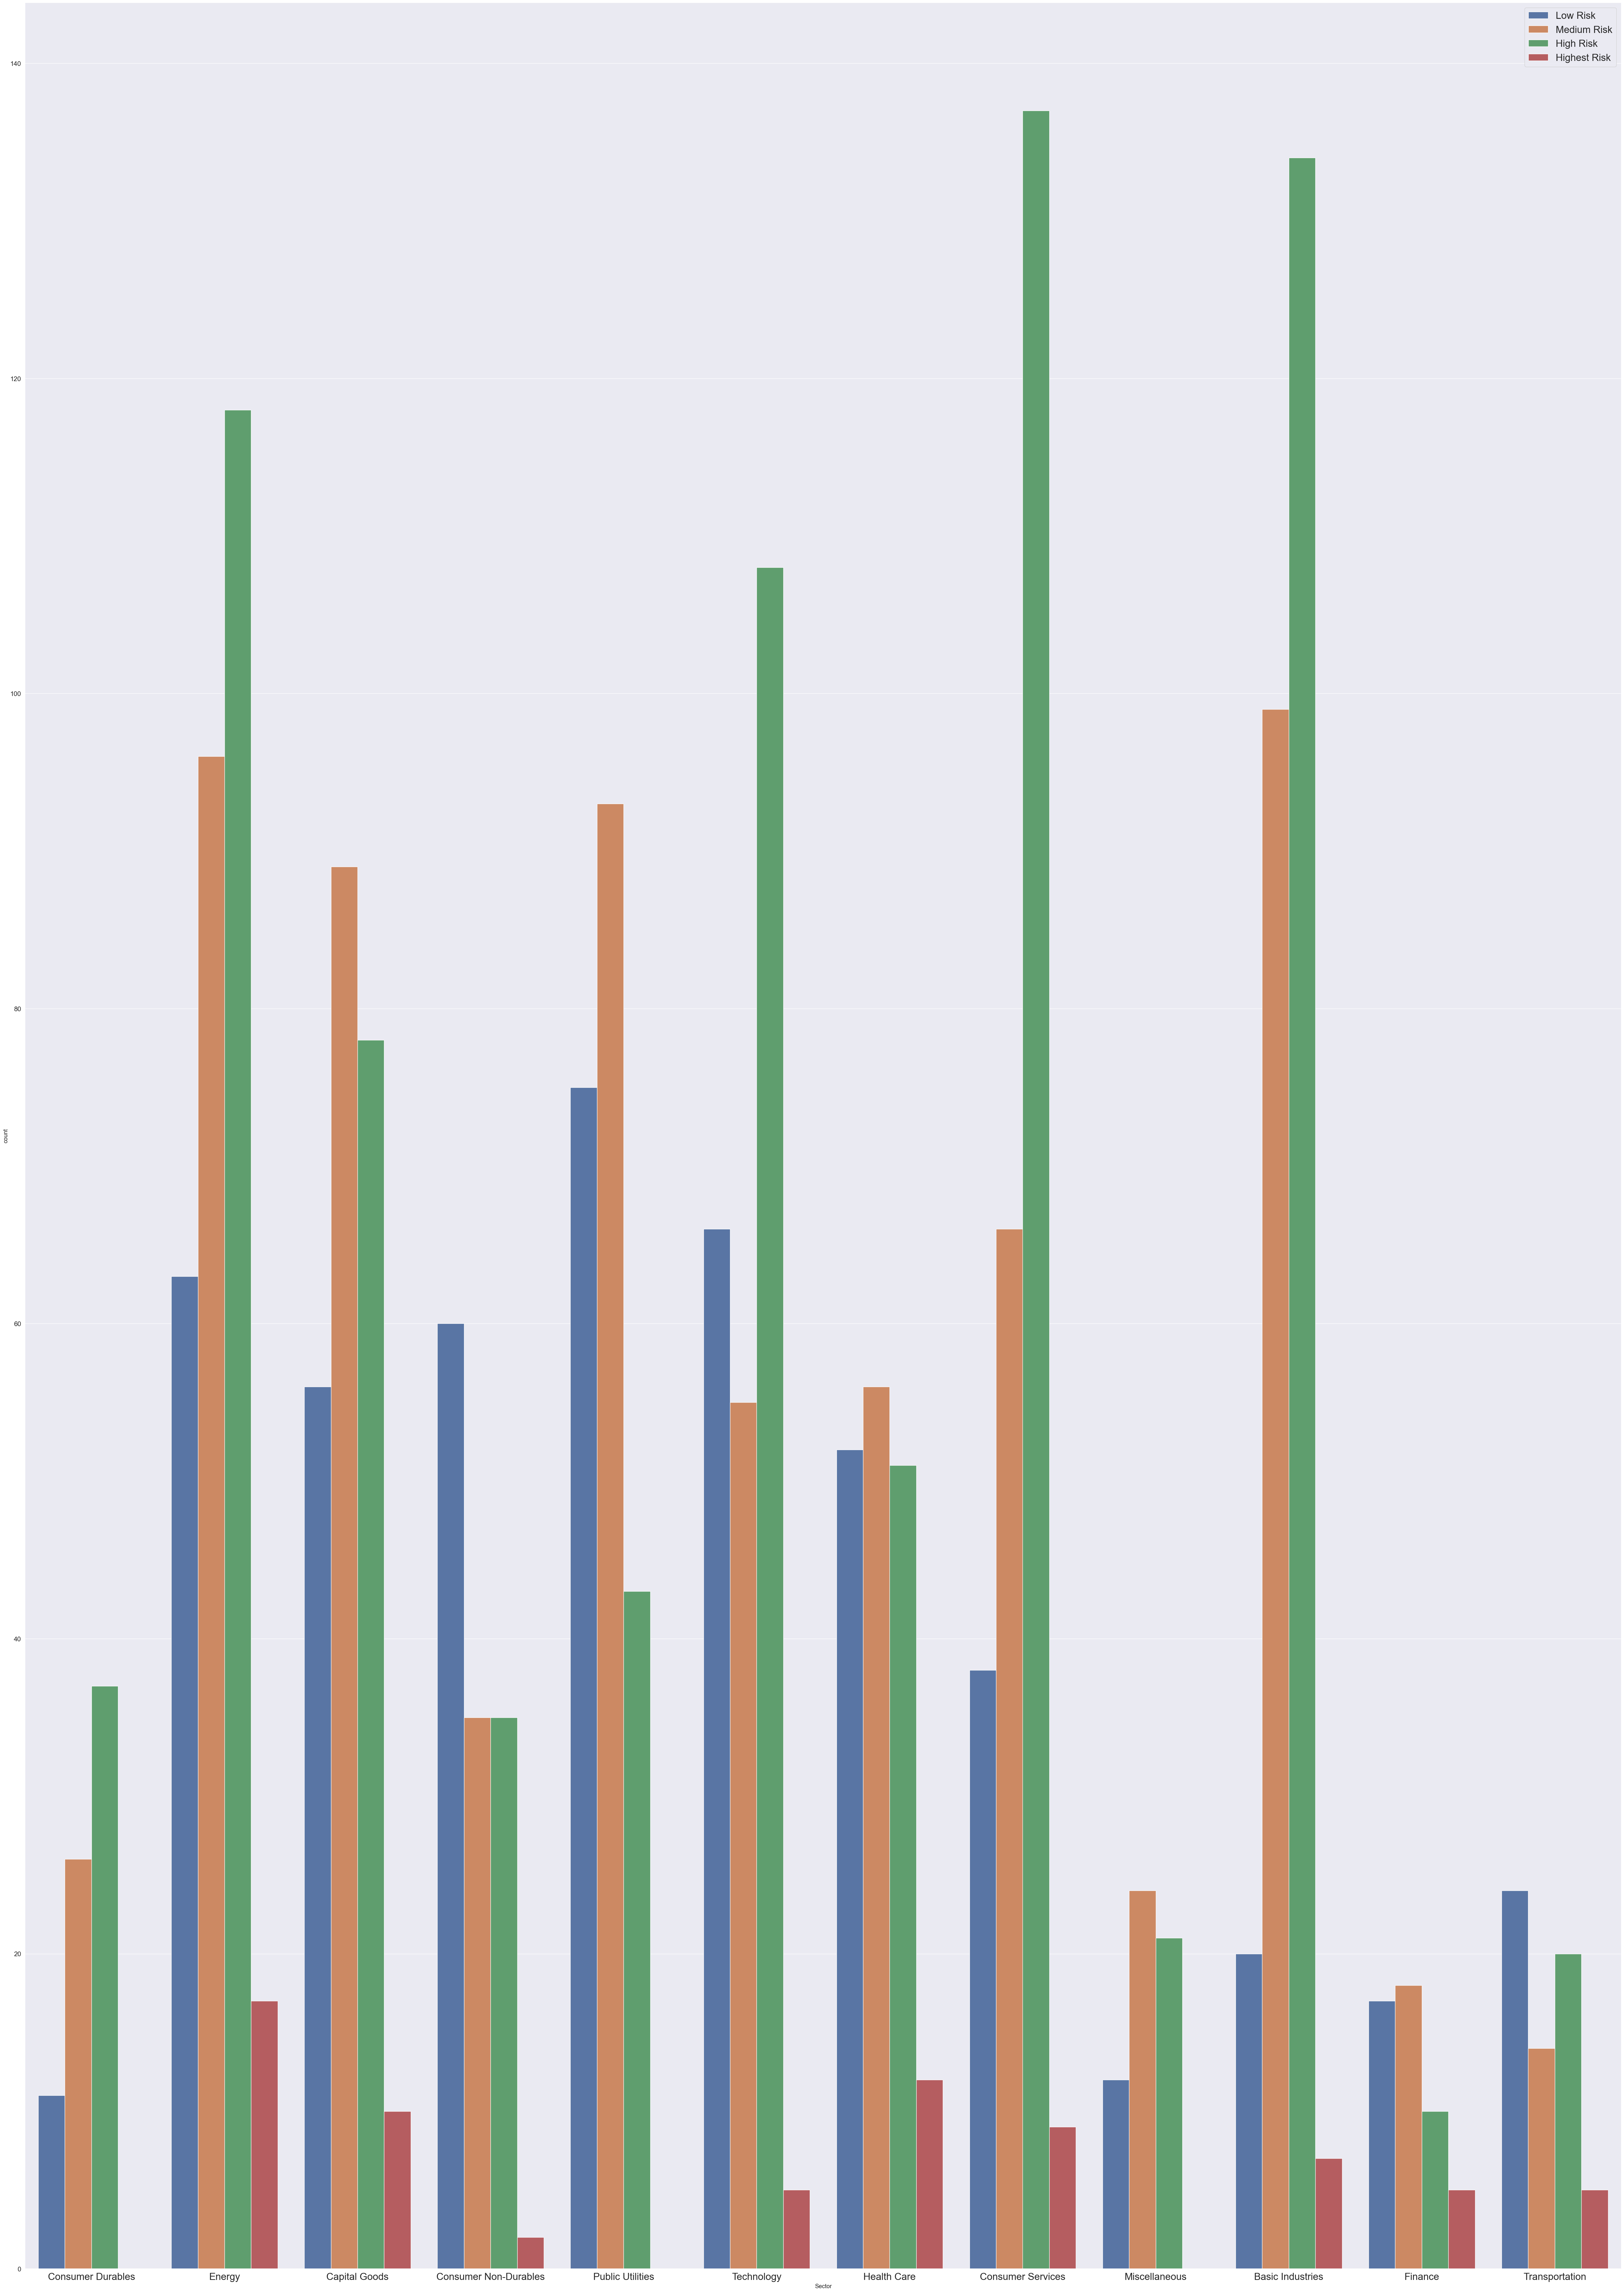

In [188]:
sns.countplot(x='Sector', hue='Rating', data=categorical)
plt.legend(fontsize=24)  # Change the font size of the legend
plt.xticks(fontsize=24)  # Change the font size of the x-axis ticks
plt.yticks(fontsize=16)  # Change the font size of the y-axis ticks
plt.show()



In fact, we are working with a dataset that has a big number of dimensions. With two variables it would not be possible to make any predictions. However this is not the case. Unfortunately we are not able to vizualise the data in all its dimensions, but luckely we will be able to perform accurate classificaitons.


In [28]:
categorical.head()

,Rating,Name,Symbol,Rating Agency Name,Sector,Year
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,Consumer Durables,2015
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,Consumer Durables,2014
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,Consumer Durables,2015
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,Consumer Durables,2012
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,Consumer Durables,2016


In [29]:
numerical.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,grossProfitMargin,returnOnAssets,assetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,enterpriseValueMultiple,operatingCashFlowSalesRatio,payablesTurnover
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.176631,0.041189,1.098948,3.008012,0.750500,0.202716,0.437551,6.810673,7.057088,0.058638,3.906655
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.175715,0.053204,1.207476,2.156783,0.683222,0.074155,0.541997,8.625473,6.460618,0.067239,4.002846
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.170843,0.032497,0.993501,3.094575,0.755774,0.214529,0.513185,9.693487,10.491970,0.074426,3.483510
3,1.019851,0.510402,0.176116,41.161738,0.020894,0.138059,0.025690,1.229563,2.630950,0.724590,1.816667,-0.147170,-1.015625,4.080741,0.028394,4.581150
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.177720,0.046363,1.081710,3.012780,0.750796,0.166966,0.451372,7.135348,8.293505,0.058065,3.857790


In [30]:
data = pd.concat((categorical,numerical),axis=1)

In [31]:
data.shape

(2029, 22)

### Machine Learning

For our machine learning model, we want to predict the credit rating of each company based on the financial ratios and informations we have. 

In order to get the best possible model, we need to ask different questions. which model should we use? which features should we take ? which hyperparameters to use? 

Finally, we will be testing our model on a new validation set that we will get through an API and Web-scraping. 

This process needs different steps : 

##### our target


In [32]:
y = data['Rating']

###### Feature selection  

we will identify which features are the most valuable for our model.
SelectFromModel: Meta-transformer for selecting features based on importance weights.

In [33]:
SFM = SelectFromModel(estimator=GradientBoostingClassifier())
s=SFM.fit(numerical,y)

In [34]:
feature_idx = s.get_support()
feature_name = numerical.columns[feature_idx]
feature_name

Index(['netProfitMargin', 'returnOnAssets', 'debtRatio',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'operatingCashFlowSalesRatio'],
      dtype='object')

##### Split the data with selected features

In [35]:
y = data['Rating']
X = data[['Symbol','Year','Sector','netProfitMargin', 'returnOnAssets', 'debtRatio',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'operatingCashFlowSalesRatio']]

In [36]:
X.dtypes

Symbol                                 object
Year                                    int64
Sector                                 object
netProfitMargin                       float64
returnOnAssets                        float64
debtRatio                             float64
freeCashFlowOperatingCashFlowRatio    float64
freeCashFlowPerShare                  float64
operatingCashFlowSalesRatio           float64
dtype: object

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_test_encoded

array([3, 0, 2, 0, 0, 3, 3, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 2, 0, 3, 3,
       0, 3, 2, 0, 2, 0, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0, 1, 0, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 3, 1, 2, 2, 0, 3, 0, 2, 2, 0, 0, 3, 3, 3, 3, 2, 2,
       3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 2, 3, 2, 2, 3, 3, 2, 0,
       0, 0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2,
       0, 1, 0, 0, 2, 0, 0, 2, 3, 3, 3, 0, 3, 2, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 1, 0, 3, 3,
       0, 3, 0, 0, 3, 0, 3, 0, 0, 2, 0, 3, 0, 0, 3, 0, 3, 2, 1, 3, 0, 0,
       0, 0, 2, 2, 3, 0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3,
       3, 3, 2, 2, 3, 2, 0, 0, 2, 0, 3, 2, 0, 3, 3, 0, 0, 2, 0, 3, 2, 0,
       0, 3, 2, 3, 3, 2, 3, 3, 0, 3, 0, 2, 2, 3, 1, 3, 2, 1, 3, 0, 3, 0,
       3, 2, 0, 0, 0, 0, 3, 2, 0, 2, 3, 3, 3, 3, 3, 2, 0, 2, 0, 3, 2, 3,
       3, 0, 2, 0, 0, 0, 3, 2, 0, 3, 3, 0, 1, 3, 3,

In [39]:
# Check the mapping between original labels and integer labels
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Mapping:", mapping)

Mapping: {'High Risk': 0, 'Highest Risk': 1, 'Low Risk': 2, 'Medium Risk': 3}


In [40]:
X_train.shape

(1623, 9)

In [41]:
y_train.shape

(1623,)

In [42]:
y_train.value_counts()

High Risk       633
Medium Risk     536
Low Risk        398
Highest Risk     56
Name: Rating, dtype: int64

###### Scaling our test and train numericals

We will be using standard scaling to scale our numericals. Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances. 

In [43]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train),columns=numericals_train.columns) 
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test),columns=numericals_test.columns)

In [44]:
numericals_train.shape

(1623, 7)

###### Encoding our categoricals

Encoding: Encoding involves converting categorical data into numerical data. This is important for some machine learning algorithms that cannot handle categorical data 

In [45]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first').fit(categoricals_train)
column_name = encoder.get_feature_names_out(categoricals_train.columns)
categoricals_train_encoded = pd.DataFrame(encoder.transform(categoricals_train).toarray(), columns=column_name)
categoricals_test_encoded = pd.DataFrame(encoder.transform(categoricals_test).toarray(),columns=column_name)

/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [48]:
categoricals_train

,Symbol,Sector
1682,RPM,Basic Industries
888,AVGO,Technology
743,TEN,Capital Goods
544,DOV,Technology
1932,BGG,Energy
...,...,...
1130,PHI,Public Utilities
1294,KMI,Public Utilities
860,EL,Consumer Non-Durables
1459,MPLX,Energy


In [49]:
categoricals_train_encoded.shape

(1623, 567)

This code will convert the categorical features in your train and test sets using pd.get_dummies and ensure that they have the same columns.

###### Concat both num and cat

In [50]:
numericals_train_standardized.reset_index(drop=True, inplace=True)
categoricals_train_encoded.reset_index(drop=True, inplace=True)
X_train_encoded = pd.concat((numericals_train_standardized, categoricals_train_encoded), axis=1)

numericals_test_standardized.reset_index(drop=True, inplace=True)
categoricals_test_encoded.reset_index(drop=True, inplace=True)
X_test_encoded = pd.concat((numericals_test_standardized, categoricals_test_encoded), axis=1)



In [51]:
numericals_train_standardized.shape

(1623, 7)

In [52]:
categoricals_train_encoded.shape

(1623, 567)

#### Balancing the data

In [53]:
# Apply SMOTE to balance the training data
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_encoded,y_train_encoded)


In [54]:
np.unique(y_train_SMOTE, return_counts=True)



(array([0, 1, 2, 3]), array([633, 633, 633, 633]))

### Fitting our models 

Now we will test a range of models. In each we will fit the model in the train data, make predictons for the test data and obtain the accuracy. In later steps we will compare the accuracy of all the models. We will use primarily the library sklearn

######  Random Forest

In [55]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_RF = RF.predict(X_test_encoded)
Accuracy_RF = metrics.accuracy_score(y_test_encoded, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.6773399014778325


In [56]:
from sklearn.metrics import confusion_matrix
RF_confusion_matrix = confusion_matrix(y_test_encoded,y_pred_RF)
RF_confusion_matrix

array([[113,   4,   9,  33],
       [ 10,   6,   0,   0],
       [  9,   0,  68,  19],
       [ 27,   0,  20,  88]])

In [57]:
class_order = RF.classes_
print(class_order)

[0 1 2 3]


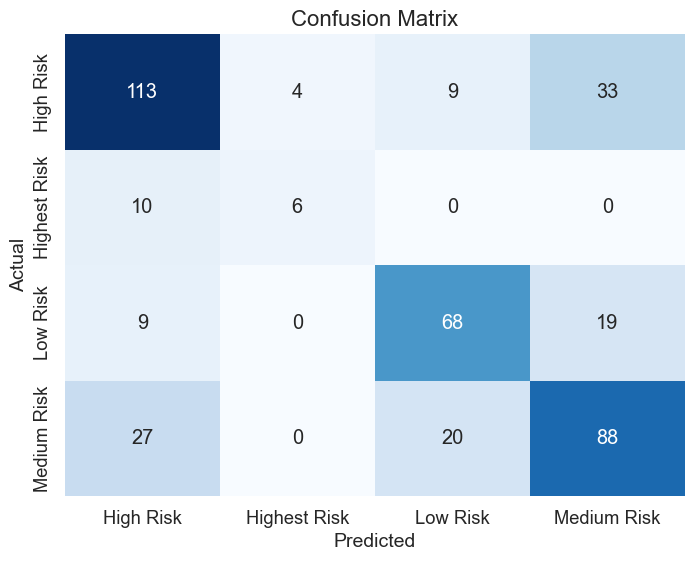

In [58]:
confusion_matrix = RF_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


###### Logistic Regression

In [59]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_LR = LR_model.predict(X_test_encoded)
Accuracy_LR = metrics.accuracy_score(y_test_encoded, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.729064039408867


In [60]:
from sklearn.metrics import confusion_matrix
LR_confusion_matrix = confusion_matrix(y_test_encoded,y_pred_LR)
LR_confusion_matrix

array([[118,  12,   4,  25],
       [  8,   7,   0,   1],
       [  4,   0,  76,  16],
       [ 18,   2,  20,  95]])

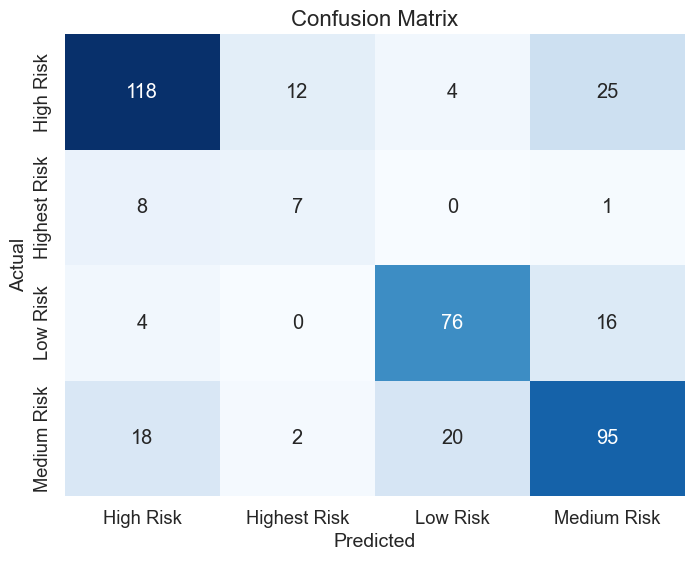

In [61]:
confusion_matrix = LR_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


###### K Nearest Neighbours

In [62]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_KNN = KNN_model.predict(X_test_encoded)
Accuracy_KNN = metrics.accuracy_score(y_test_encoded, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.6157635467980296


In [63]:
from sklearn.metrics import confusion_matrix
KNN_confusion_matrix = confusion_matrix(y_test_encoded,y_pred_KNN)
KNN_confusion_matrix

array([[87, 30, 21, 21],
       [ 3, 11,  1,  1],
       [ 5,  4, 79,  8],
       [23, 11, 28, 73]])

###### XGB

In [64]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =4)
XGB_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_XGB = XGB_model.predict(X_test_encoded)
Accuracy_XGB = metrics.accuracy_score(y_test_encoded, y_pred_XGB)
print("XGB Accuracy:",Accuracy_XGB)

XGB Accuracy: 0.6600985221674877


In [65]:
from sklearn.metrics import confusion_matrix
XGB_confusion_matrix = confusion_matrix(y_test_encoded,y_pred_XGB)
XGB_confusion_matrix

array([[108,   3,  16,  32],
       [  9,   7,   0,   0],
       [ 13,   0,  65,  18],
       [ 28,   0,  19,  88]])

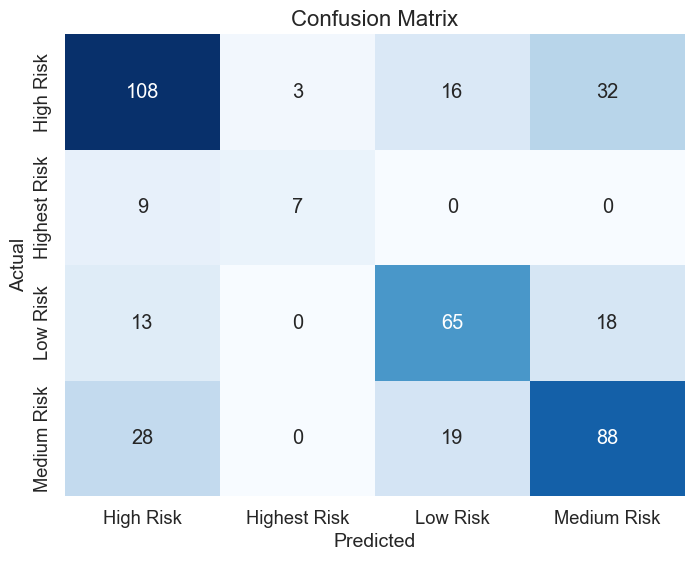

In [66]:
confusion_matrix = XGB_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


###### Decision Trees

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=3)
DT_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_DT = DT_model.predict(X_test_encoded)
Accuracy_DT = metrics.accuracy_score(y_test_encoded, y_pred_DT)
print("DT Accuracy:",Accuracy_DT)

DT Accuracy: 0.3891625615763547


###### Naive Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_NB = NB_model.predict(X_test_encoded)
Accuracy_NB = metrics.accuracy_score(y_test_encoded, y_pred_NB)
print("NB Accuracy:",Accuracy_NB)

NB Accuracy: 0.6945812807881774


In [69]:
from sklearn.metrics import confusion_matrix
NB_confusion_matrix = confusion_matrix(y_test_encoded,y_pred_NB)
NB_confusion_matrix

array([[97, 34,  5, 23],
       [ 6, 10,  0,  0],
       [ 0,  3, 90,  3],
       [ 8,  7, 35, 85]])

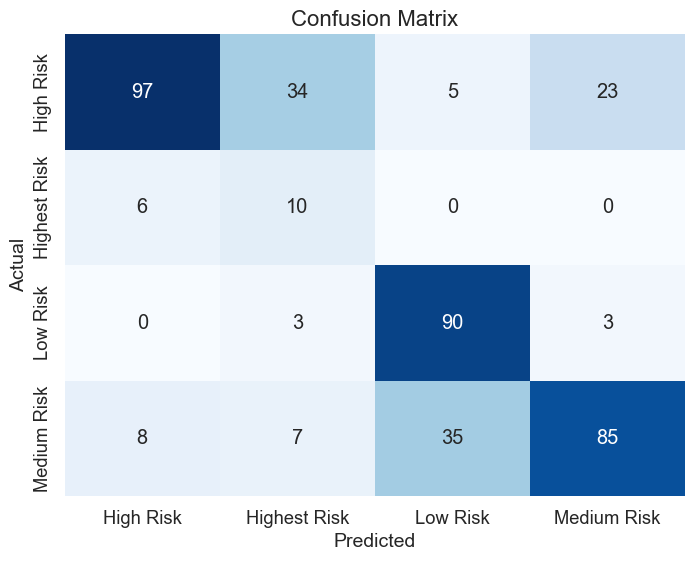

In [70]:
confusion_matrix = NB_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

###### Comparing results

In [71]:
accuracy_list = [Accuracy_LR,Accuracy_NB,Accuracy_RF,Accuracy_XGB, Accuracy_KNN,Accuracy_DT]

model_list = ['LR','NB','Random Forest','XGB','KNN','DT']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

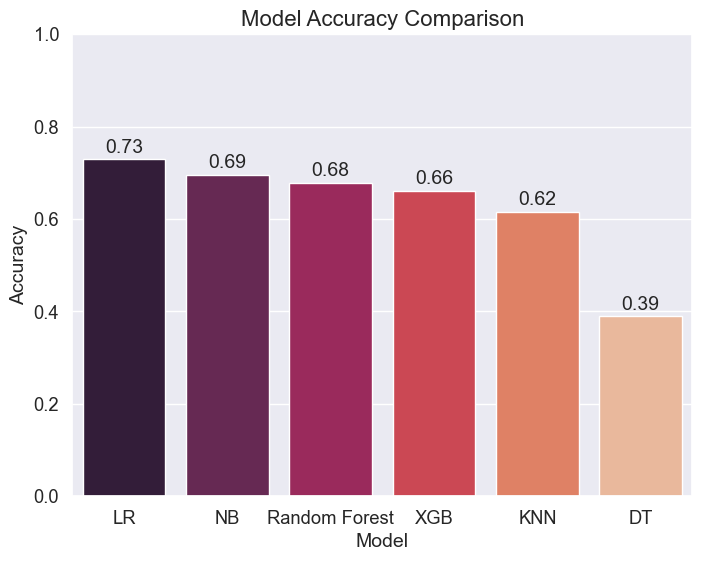

In [72]:
sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

bar_plot=sns.barplot(x='Model', y="Accuracy", data=df_accuracy, palette="rocket")

plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
# Annotate each bar with the accuracy value
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline',
                      size=14,
                      xytext=(0, 5),
                      textcoords='offset points')

plt.show()


LR is the best performing model.

###### LR Hyperparameter Tunning

LR model has achieved a very high accuracy given that we have 4 different classes. Now we will try to increase the performance even more.

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_distributions = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 500, 1000]
}

model = LogisticRegression()

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=100,  # number of parameter settings that are sampled
    cv=5,  # cross-validation generator
    n_jobs=-1,  # number of jobs to run in parallel (-1 means use all available processors)
    random_state=42  # random state for reproducibility
)

# Fit the random search to the data
random_search.fit(X_train_encoded, y_train)


/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42)

In [74]:
params = random_search.best_params_

In [75]:
random_search.best_score_

0.7307179487179487

In [76]:
params

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 10}

In [77]:
# Train a new LogisticRegression model with the best parameters
best_LR_model = LogisticRegression(**params, random_state=1234)
best_LR_model.fit(X_train_encoded, y_train)

# Evaluate the model on test data
accuracy = best_LR_model.score(X_test_encoded, y_test)
accuracy

0.7536945812807881

In [78]:
y_pred_LR_best = best_LR_model.predict(X_test_encoded)
Accuracy_LR_best = metrics.accuracy_score(y_test, y_pred_LR_best)
print("LR Accuracy:",Accuracy_LR_best)

LR Accuracy: 0.7536945812807881


In [79]:
from sklearn.metrics import confusion_matrix
LR_best_confusion_matrix = confusion_matrix(y_test,y_pred_LR_best)
LR_best_confusion_matrix

array([[133,   2,   1,  23],
       [  9,   5,   1,   1],
       [  5,   0,  74,  17],
       [ 22,   0,  19,  94]])

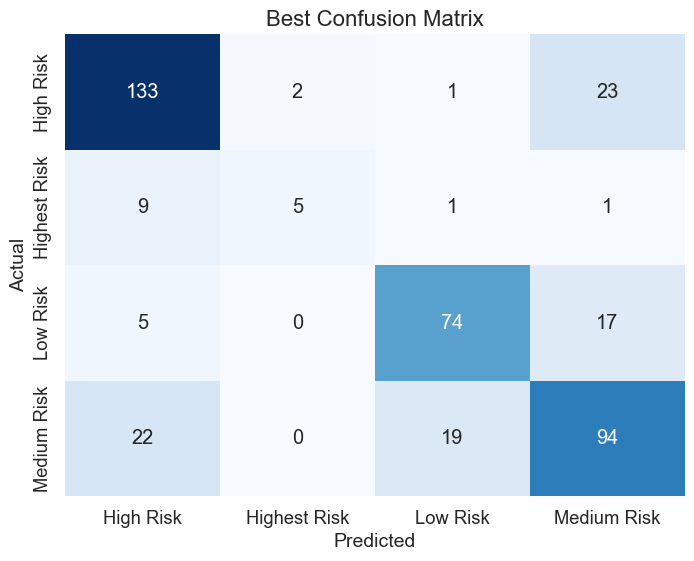

In [80]:
confusion_matrix = LR_best_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Best Confusion Matrix', fontsize=16)
plt.show()

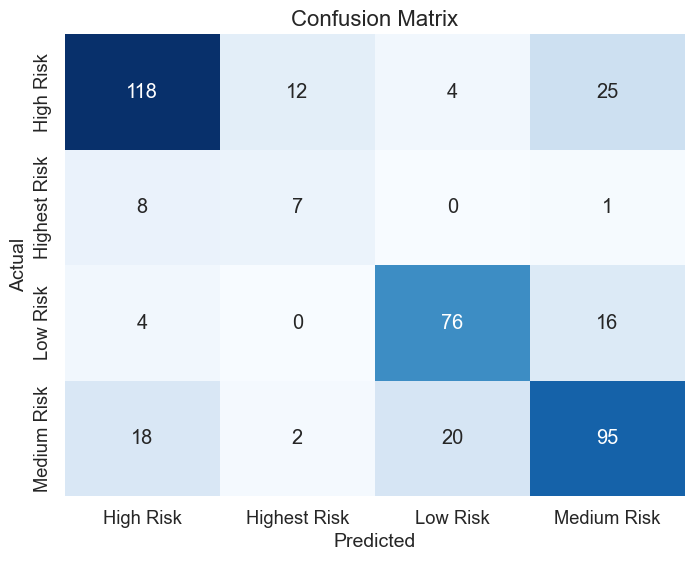

In [81]:
confusion_matrix = LR_confusion_matrix

class_names = ['High Risk','Highest Risk','Low Risk','Medium Risk']  # Replace these with the actual class names

sns.set(font_scale=1.2)  # Adjust the font scale if necessary
plt.figure(figsize=(8, 6))  # Adjust the figure size if necessary

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

After choosing our hyperparameters, we fall at our best LR model with an accuracy of 75% and looking at the confusion matrix, our 2 most important ratings to look at are high and low risk.

out of 159 high risk ratings, we predicted only 1 low risk. 


# Pickling our model and tranformers

In [82]:
pickle.dump(best_LR_model, open('model_LR.pkl', 'wb'))

In [164]:
pickle.dump(transformer, open('transformer.pkl', 'wb'))

In [163]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))

### Using our model on a validation set 

###### Preparing our validation set through API scraping

•Fetch financial data from the API : We fetched financial data from the Financial Modeling Prep API for a list of company symbols. We extracted the required financial ratios and created a DataFrame with the columns: 'Symbol', 'Year', 'Sector', 'netProfitMargin', 'returnOnAssets', 'debtRatio', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', and 'operatingCashFlowSalesRatio'.

In [167]:
import requests
import pandas as pd

# Replace YOUR_API_KEY with your actual API key
api_key = "65949812149ab8630d586597ab9a6eab"

# Define the base URL for the API
base_url = "https://financialmodelingprep.com/api/v3"

# Define the list of symbols (companies) you want to fetch data for
symbols = ['AAPL', 'GOOG','T','TSLA','MSFT','MVIS','INO','SNDL','NVAX','WKHS','BLNK','AMC','ORCL','NVDA','BMY','C','GOOGL','FB','INTC','JNJ','PFE','MCD','BA','V','WMT','AXP','GS','MRK','JPM','BAC','KO','PEP','WMT','CVX','BP','COP']

# Initialize an empty list to store the data for each company
data = []

# Loop through each symbol and fetch the financial data
for symbol in symbols:
    try:
        # Construct the API URL for the financial data
        financials_url = f"{base_url}/financials/income-statement/{symbol}?apikey={api_key}"
        financials_data = requests.get(financials_url).json()

        # Extract the required financial data
        financial_data = financials_data["financials"][0]

        # Construct the API URL for the balance sheet data
        balance_sheet_url = f"{base_url}/financials/balance-sheet-statement/{symbol}?apikey={api_key}"
        balance_sheet_data = requests.get(balance_sheet_url).json()

        # Extract the required balance sheet data
        balance_sheet = balance_sheet_data["financials"][0]

        # Construct the API URL for the cash flow data
        cash_flow_url = f"{base_url}/financials/cash-flow-statement/{symbol}?apikey={api_key}"
        cash_flow_data = requests.get(cash_flow_url).json()

        # Extract the required cash flow data
        cash_flow = cash_flow_data["financials"][0]

        # Construct the API URL for the company profile data (to get the sector)
        profile_url = f"{base_url}/company/profile/{symbol}?apikey={api_key}"
        profile_data = requests.get(profile_url).json()

        # Extract the required profile data
        sector = profile_data["profile"]["sector"]

        # Calculate the required ratios
        net_profit_margin = float(financial_data["Net Income"]) / float(financial_data["Revenue"])
        return_on_assets = float(financial_data["Net Income"]) / float(balance_sheet["Total assets"])
        debt_ratio = float(balance_sheet["Total debt"]) / float(balance_sheet["Total assets"])
        free_cash_flow_operating_cash_flow_ratio = float(cash_flow["Free Cash Flow"]) / float(cash_flow["Operating Cash Flow"])
        free_cash_flow_per_share = float(cash_flow["Free Cash Flow"])
        operating_cash_flow_sales_ratio = float(cash_flow["Operating Cash Flow"]) / float(financial_data["Revenue"])

        # Create a dictionary with the extracted data and calculated ratios
        company_data = {
            "Symbol": symbol,
            "Year": financial_data["date"][:4],
            "Sector": sector,
            "netProfitMargin": net_profit_margin,
            "returnOnAssets": return_on_assets,
            "debtRatio": debt_ratio,
            "freeCashFlowOperatingCashFlowRatio": free_cash_flow_operating_cash_flow_ratio,
            "freeCashFlowPerShare": free_cash_flow_per_share,
            "operatingCashFlowSalesRatio": operating_cash_flow_sales_ratio,
        }

        # Append the extracted data to the data list
        data.append(company_data)

    except KeyError as e:
        print(f"Error fetching data for {symbol}: {e}")
        print(f"Response: {financials_data}")

# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data)

df


,Symbol,Year,Sector,netProfitMargin,returnOnAssets,debtRatio,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,operatingCashFlowSalesRatio
0,AAPL,2021,Technology,0.258818,0.269742,0.355323,0.893452,9.295300e+10,0.284399
1,GOOG,2021,Communication Services,0.295117,0.211633,0.079036,0.731157,6.701200e+10,0.355741
2,T,2021,Communication Services,0.118918,0.036404,0.362487,0.606097,2.543000e+10,0.248466
3,TSLA,2021,Consumer Cyclical,0.102540,0.088828,0.142811,0.302949,3.483000e+09,0.213608
4,MSFT,2021,Technology,0.364517,0.183568,0.203054,0.731274,5.611800e+10,0.456547
5,MVIS,2021,Technology,-17.280000,-0.331734,0.048155,0.970004,-2.852200e+07,-11.761600
6,INO,2021,Healthcare,-171.098657,-0.612287,0.066587,1.005707,-2.169395e+08,-121.542500
7,SNDL,2021,Healthcare,-4.104582,-0.781298,0.004883,1.055205,-6.066900e+07,-1.024355
8,NVAX,2021,Healthcare,-1.521213,-0.676724,0.176187,0.821995,2.654600e+08,0.281731
9,WKHS,2021,Consumer Cyclical,471.105116,-1.759213,0.115104,1.040084,-1.378913e+08,155.621175


###### Preprocess the data

In [168]:
df['Year'] = df['Year'].astype(int)

In [169]:
df.to_csv("validation_data.csv", index=False)

In [170]:
X_val = df

In [171]:
numericals_val = X_val.select_dtypes(np.number)

from sklearn.preprocessing import StandardScaler

X_v_n = pd.DataFrame(transformer.transform(numericals_val),columns=numericals_train.columns) 
#apply the same tranformer 

In [172]:
X_v_n.dtypes

Year                                  float64
netProfitMargin                       float64
returnOnAssets                        float64
debtRatio                             float64
freeCashFlowOperatingCashFlowRatio    float64
freeCashFlowPerShare                  float64
operatingCashFlowSalesRatio           float64
dtype: object

In [173]:
X_train.columns == X_val.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [174]:
categoricals_v = X_val.select_dtypes(object)
categoricals_v_encoded = pd.DataFrame(encoder.transform(categoricals_v).toarray(),columns=column_name)
#categoricals_v_encoded

/Users/meysouromezzine/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [175]:
X_validate = pd.concat((categoricals_v_encoded,X_v_n),axis=1)

In [176]:
#X_validate

In [177]:
X_validate_filled = X_validate.fillna(X_validate.mean())

###### Predict the outcomes

In [178]:
y_pred_val = best_LR_model.predict(X_validate_filled)

In [179]:
y_pred_df = pd.DataFrame(y_pred_val, columns=['Predicted'])
#y_pred_df

###### Create a DataFrame with predictions

In [180]:
df_reset = df.reset_index(drop=True)
y_pred_df_reset = y_pred_df.reset_index(drop=True)
data_validate = pd.concat([df_reset, y_pred_df_reset], axis=1)
data_validate

,Symbol,Year,Sector,netProfitMargin,returnOnAssets,debtRatio,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,operatingCashFlowSalesRatio,Predicted
0,AAPL,2021,Technology,0.258818,0.269742,0.355323,0.893452,9.295300e+10,0.284399,Low Risk
1,GOOG,2021,Communication Services,0.295117,0.211633,0.079036,0.731157,6.701200e+10,0.355741,Low Risk
2,T,2021,Communication Services,0.118918,0.036404,0.362487,0.606097,2.543000e+10,0.248466,Low Risk
3,TSLA,2021,Consumer Cyclical,0.102540,0.088828,0.142811,0.302949,3.483000e+09,0.213608,Low Risk
4,MSFT,2021,Technology,0.364517,0.183568,0.203054,0.731274,5.611800e+10,0.456547,Low Risk
5,MVIS,2021,Technology,-17.280000,-0.331734,0.048155,0.970004,-2.852200e+07,-11.761600,Medium Risk
6,INO,2021,Healthcare,-171.098657,-0.612287,0.066587,1.005707,-2.169395e+08,-121.542500,Medium Risk
7,SNDL,2021,Healthcare,-4.104582,-0.781298,0.004883,1.055205,-6.066900e+07,-1.024355,Medium Risk
8,NVAX,2021,Healthcare,-1.521213,-0.676724,0.176187,0.821995,2.654600e+08,0.281731,Low Risk
9,WKHS,2021,Consumer Cyclical,471.105116,-1.759213,0.115104,1.040084,-1.378913e+08,155.621175,Medium Risk


In [181]:
# google the first 10 companies rating 

###### Visualize Companies

we will visualize which companies are considered secure to lend money according to agencies. We will make 4 different wordclouds, one for each rating of risk.

First, we extract the company symbols and convert them to lists

In [182]:
high_risk = data_validate[data_validate['Predicted'] == 'High Risk']
medium_risk = data_validate[data_validate['Predicted'] == 'Medium Risk']
low_risk = data_validate[data_validate['Predicted'] == 'Low Risk']
highest_risk = data_validate[data_validate['Predicted'] == 'Highest Risk']


companies_HR = high_risk['Symbol'].tolist()
companies_MR = medium_risk['Symbol'].tolist()
companies_LR = low_risk['Symbol'].tolist()
companies_HRest = highest_risk['Symbol'].tolist()

Convert the lists of company symbols into strings

In [183]:
text_MR = " ".join(companies_MR)
text_LR = " ".join(companies_LR)
text_HR = " ".join(companies_HR)
text_HRest = " ".join(companies_HRest)

In this step we use the function wordcloud to create the plot.

In [184]:
wordcloud_MR = WordCloud(background_color='white', colormap="twilight", max_font_size=25, min_font_size=10).generate(text_MR)
wordcloud_LR = WordCloud(background_color='white', colormap="twilight", max_font_size=25, min_font_size=10).generate(text_LR)
#wordcloud_HR = WordCloud(background_color='white', colormap="ocean", max_font_size=25, min_font_size=10).generate(text_HR)


we plot it to better visualize the companies. 


Text(0.5, 1.0, 'Low Risk Companies')

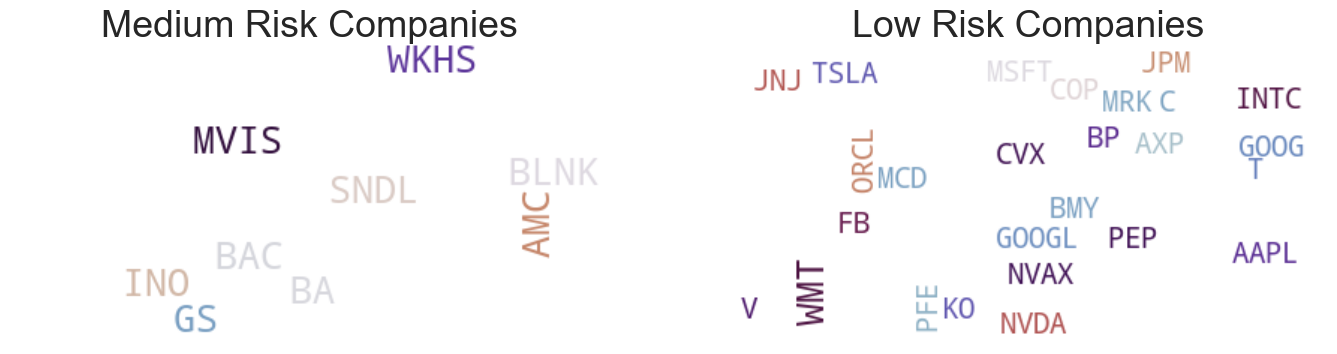

In [185]:
fig = plt.figure(figsize = (17,10))
axes = fig.subplots(nrows=1, ncols=1)

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_MR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Medium Risk Companies', fontsize = 27)

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_LR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Low Risk Companies', fontsize = 27)

#plt.subplot(2, 2, 3)
#plt.imshow(wordcloud_HR, interpolation="bilinear") 
#plt.axis("off") 
#plt.margins(x=0, y=0)
#plt.title('High Risk Companies', fontsize = 27)

#plt.subplot(2, 2, 4)
#plt.imshow(wordcloud_HRest, interpolation="bilinear") 
#plt.axis("off") 
#plt.margins(x=0, y=0)
#plt.title('Highest Risk Companies', fontsize = 27, fontweight = 2)